![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [40]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import math

# set style for dark background
plt.style.use('dark_background')

# set precision for pandas
pd.set_option('precision', 4)

### 3.1 Análise exploratória

In [3]:
# load csv into a DataFrame
churn_df = pd.read_csv('Churn_Modelling.csv')
# remove first column
churn_df.drop(columns=['RowNumber'], inplace=True)
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
active_member = pd.cut(churn_df.IsActiveMember, 2, labels=["Inactive", "Active"])
active_member

0         Active
1         Active
2       Inactive
3       Inactive
4         Active
          ...   
9995    Inactive
9996      Active
9997      Active
9998    Inactive
9999    Inactive
Name: IsActiveMember, Length: 10000, dtype: category
Categories (2, object): ['Inactive' < 'Active']

In [5]:
churn = pd.cut(churn_df.Exited, 2, labels=["Not Churn", "Churn"], ordered=False)
churn

0           Churn
1       Not Churn
2           Churn
3       Not Churn
4       Not Churn
          ...    
9995    Not Churn
9996    Not Churn
9997        Churn
9998        Churn
9999    Not Churn
Name: Exited, Length: 10000, dtype: category
Categories (2, object): ['Not Churn', 'Churn']

In [6]:
observed = pd.crosstab(churn, active_member, margins=True)
observed

IsActiveMember,Inactive,Active,All
Exited,,,
Not Churn,3547,4416,7963
Churn,1302,735,2037
All,4849,5151,10000


In [7]:
prop_total = pd.crosstab(churn, active_member, margins=True, normalize='all')
prop_total

IsActiveMember,Inactive,Active,All
Exited,,,
Not Churn,0.3547,0.4416,0.7963
Churn,0.1302,0.0735,0.2037
All,0.4849,0.5151,1.0000


In [8]:
prop_row = pd.crosstab(churn, active_member, margins=True, normalize='index')
prop_row

IsActiveMember,Inactive,Active
Exited,,
Not Churn,0.4454,0.5546
Churn,0.6392,0.3608
All,0.4849,0.5151


In [9]:
prop_column = pd.crosstab(churn, active_member, margins=True, normalize='columns')
prop_column

IsActiveMember,Inactive,Active,All
Exited,,,
Not Churn,0.7315,0.8573,0.7963
Churn,0.2685,0.1427,0.2037


In [19]:
crosstab, test_results, expected = rp.crosstab(churn, active_member,
                                              test='chi-square',
                                              expected_freqs=True,
                                               margins=False)
                                              #prop='cell')

In [20]:
crosstab

IsActiveMember       
IsActiveMember       Inactive Active
Exited                              
Not Churn                3547   4416
Churn                    1302    735

In [21]:
expected

IsActiveMember           
IsActiveMember       Inactive     Active
Exited                                  
Not Churn           3861.2587  4101.7413
Churn                987.7413  1049.2587

In [27]:
residuals = (crosstab - expected)
residuals

IsActiveMember          
IsActiveMember       Inactive    Active
Exited                                 
Not Churn           -314.2587  314.2587
Churn                314.2587 -314.2587

In [36]:
chsqr_results = (residuals**2) / expected

In [37]:
chsqr = chsqr_results.stack().sum()

In [38]:
chsqr

IsActiveMember    243.7604
dtype: float64

In [42]:
cramers = math.sqrt(chsqr / 10000)
cramers

0.1561282781889051

In [39]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,243.7604
1,p-value =,0.0000
2,Cramer's phi =,0.1561


In [3]:
# check observations and features, datatypes, dataframe size
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
# check dataframe size
churn_df.shape

(10000, 13)

In [5]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.0000e+04,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,1.5691e+07,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,7.1936e+04,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.5566e+07,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,1.5629e+07,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,1.5691e+07,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,1.5753e+07,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,1.5816e+07,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


In [6]:
clients_geo = churn_df.Geography.value_counts()
clients_geo

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Visualisation

<AxesSubplot:>

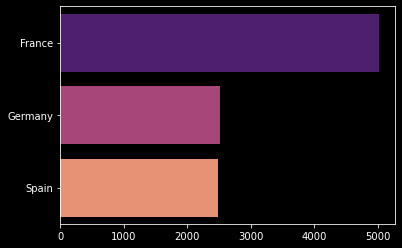

In [7]:
# clients x Geography
sns.barplot(x=clients_geo.values, 
            y=clients_geo.keys(), 
            palette='magma', orient='h')

In [8]:
# % exited by country
exit_geography = churn_df.groupby('Geography').Exited.value_counts()
exit_geography

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [9]:
# check the proportion of exited customers per country
exit_geography = churn_df.groupby('Geography').Exited.value_counts(normalize=True)
exit_geography

Geography  Exited
France     0         0.8385
           1         0.1615
Germany    0         0.6756
           1         0.3244
Spain      0         0.8333
           1         0.1667
Name: Exited, dtype: float64

<AxesSubplot:xlabel='Geography'>

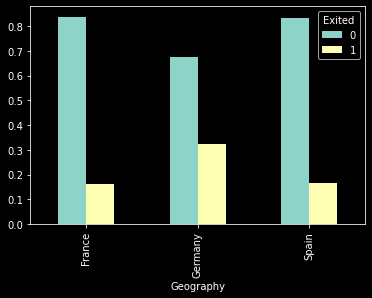

In [10]:
exit_geography.unstack().plot(kind='bar')

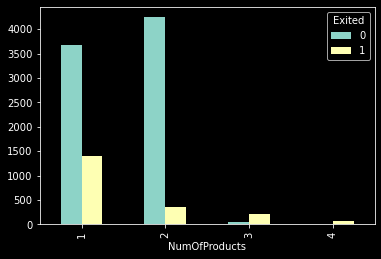

In [11]:
# number of products and churn
prods_churn = churn_df.groupby('NumOfProducts').Exited.value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='HasCrCard'>

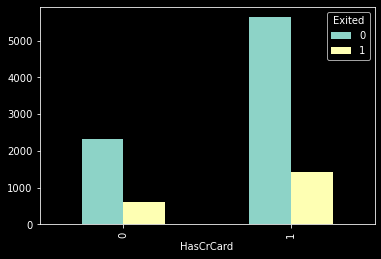

In [12]:
churn_df.groupby(churn_df.HasCrCard).Exited.value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='IsActiveMember'>

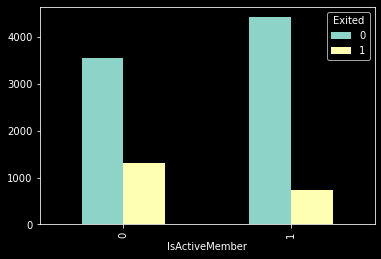

In [13]:
churn_df.groupby(churn_df.IsActiveMember).Exited.value_counts().unstack().plot(kind='bar')

In [ ]:
# need to ensure that the test/val/training data is stratified by country
import numpy as np

In [ ]:
churn_df['age_cat'] = pd.cut(churn_df["Age"],
                             bins=[0, 20, 40, 60, 80, np.inf],
                             labels=[1, 2, 3, 4, 5])

In [ ]:
churn_df.age_cat

### 3.2 Preparação e limpeza dos dados

The dataset has no null values. The Surname and CustomerId columns will also be removed initially.

France has got about twice as much clients than both Spain and Germany.

France and Spain have a higher client retention rate (both 83%) as opposed to Germany where it stands for about 2/3 of the clients.

In [3]:
# seu código
churn_df.CustomerId.nunique()

10000

### 3.3 Seleção de atributos

In [ ]:
# seu código

In [ ]:
# seu código

### 3.4 Construção do modelo

In [ ]:
# seu código

In [ ]:
# seu código

### 3.5 Avaliação do modelo

In [ ]:
# seu código

In [ ]:
# seu código

### 3.4 Otimização do modelo

In [ ]:
# seu código

In [ ]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.